# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


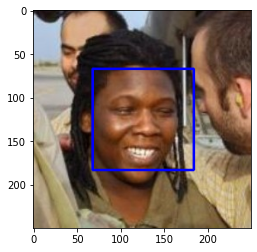

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [214]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [215]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_detected_human = []
for i in tqdm(range(len(human_files_short))):
    human_detected_human.append(face_detector(human_files_short[i]))
print('percentage of humans detected human : ',np.mean(human_detected_human) * 100 , ' %')

dog_detected_human = []
for i in tqdm(range(len(dog_files_short))):
    dog_detected_human.append(face_detector(dog_files_short[i]))
print('percentage of dogs detected human : ',np.mean(dog_detected_human) * 100 ,' %')

  0%|                                                   | 0/100 [00:00<?, ?it/s]

percentage of humans detected human :  97.0  %


100%|█████████████████████████████████████████| 100/100 [00:21<00:00,  4.62it/s]

percentage of dogs detected human :  13.0  %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [198]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](https://pytorch.org/vision/stable/models.html).

In [216]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    transformer = transforms.Compose([transforms.Resize(224),transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])
    image = transformer(Image.open(img_path))
    VGG16.eval()
    return VGG16(image[None,]).argmax().item() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [217]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    predicted = VGG16_predict(img_path)
    return all([predicted >= 151 , predicted <= 268]) # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [218]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_detected_dog = []
for i in tqdm(range(len(human_files_short))):
    human_detected_dog.append(dog_detector(human_files_short[i]))
print('percentage of humans detected dog : ',np.mean(human_detected_dog) * 100 , ' %')

dog_detected_dog = []
for i in tqdm(range(len(dog_files_short))):
    dog_detected_dog.append(dog_detector(dog_files_short[i]))
print('percentage of dogs detected dog : ',np.mean(dog_detected_dog) * 100 , ' %')

  0%|                                                   | 0/100 [00:00<?, ?it/s]

percentage of humans detected dog :  0.0  %


100%|█████████████████████████████████████████| 100/100 [00:36<00:00,  2.75it/s]

percentage of dogs detected dog :  100.0  %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [141]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
batch_size = 50
train_transformer = transforms.Compose([transforms.RandomResizedCrop((224,224)),transforms.RandomRotation(30),transforms.ToTensor(),\
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])
test_transformer = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),\
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])
dog_train_df = datasets.ImageFolder('dogImages/train',transform= train_transformer)
dog_valid_df = datasets.ImageFolder('dogImages/valid',transform= test_transformer)
dog_test_df = datasets.ImageFolder('dogImages/test',transform= test_transformer)
dog_train_loader = torch.utils.data.DataLoader(dog_train_df,batch_size= batch_size,shuffle = True)
dog_valid_loader = torch.utils.data.DataLoader(dog_valid_df,batch_size= batch_size,shuffle = True)
dog_test_loader = torch.utils.data.DataLoader(dog_test_df,batch_size= batch_size,shuffle = True)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?

**Answer**: for training the the images are randomly resized and croped to a size of 224 so I can use the same loader for transfer learning model and also that do some augmentaion to the data .
for testing and validation images are resized to 224 .

- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: I used translation and rotation to augment the data of training 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [142]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.features = nn.Sequential(
        nn.Conv2d(3,10,5,padding= 2),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        
        nn.Conv2d(10,20,5,padding= 2),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        
            
        nn.Conv2d(20,40,5,padding= 2),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
            
        nn.Conv2d(40,80,5,padding= 2),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        
            
        nn.Flatten(),
        nn.Dropout(.30),
            
        nn.Linear(14*14*80,4000),
        nn.ReLU(),
        nn.Dropout(.30),
            
        nn.Linear(4000,1000),
        nn.ReLU(),
        nn.Dropout(.30),
            
        nn.Linear(1000,500),
        nn.ReLU(),
        nn.Dropout(.30),
            
        nn.Linear(500,len(dog_train_df.classes))#,
        #nn.ReLU(),
        #nn.Softmax()
        )
    def forward(self, x):
        ## Define forward behavior
        x = self.features.forward(x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__
- I used 4 convolutional layers to extract features each with kernel size of 5 to reduce noise padding of 2 to  reserve the size 
- for each convolutional layer I used maxpool with stride and kernel size of 2 to reduce dimentionality and keep most of features
- I used 4 linear layers with 30% dropout to avoid overfitting 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [143]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = torch.optim.SGD(model_scratch.parameters(), lr=.05 , momentum= .5)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [144]:
loaders_scratch = {'train' : dog_train_loader ,
                  'valid' : dog_valid_loader ,
                  'test' : dog_test_loader}

In [145]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, valid_loss_min = np.Inf ):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    # I moved the valid_loss_min as an argument so I can specify it to the least achived
    # so if I retrain the model do not save a worse parametars 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in tqdm(enumerate(loaders['train'])):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            prediction = model(data)
            #print(prediction)
            error = criterion(prediction,target)
            #print(error)
            error.backward()
            optimizer.step()
            train_loss += ((1 / (batch_idx + 1)) * (error.data - train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in tqdm(enumerate(loaders['valid'])):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            prediction = model(data)
            valid_loss += ((1 / (batch_idx + 1)) * (criterion(prediction,target).data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            print('model saved ---------------')
    # return trained model
    return model


# train the model
#model_scratch = 
train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt' ,valid_loss_min = 3.051394)

# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))

134it [04:34,  2.04s/it]
17it [00:16,  1.05it/s]


Epoch: 1 	Training Loss: 4.888171 	Validation Loss: 4.883688


0it [00:00, ?it/s]

model saved ---------------


134it [05:02,  2.26s/it]
17it [00:16,  1.04it/s]


Epoch: 2 	Training Loss: 4.876950 	Validation Loss: 4.861093


0it [00:00, ?it/s]

model saved ---------------


134it [04:15,  1.90s/it]
17it [00:16,  1.04it/s]


Epoch: 3 	Training Loss: 4.851799 	Validation Loss: 4.809730


0it [00:00, ?it/s]

model saved ---------------


134it [04:16,  1.92s/it]
17it [00:16,  1.03it/s]


Epoch: 4 	Training Loss: 4.826736 	Validation Loss: 4.765792


0it [00:00, ?it/s]

model saved ---------------


134it [04:14,  1.90s/it]
17it [00:16,  1.05it/s]


Epoch: 5 	Training Loss: 4.798155 	Validation Loss: 4.738812


0it [00:00, ?it/s]

model saved ---------------


134it [04:15,  1.90s/it]
17it [00:16,  1.03it/s]


Epoch: 6 	Training Loss: 4.746074 	Validation Loss: 4.661507


0it [00:00, ?it/s]

model saved ---------------


134it [04:15,  1.91s/it]
17it [00:16,  1.04it/s]


Epoch: 7 	Training Loss: 4.711065 	Validation Loss: 4.630092


0it [00:00, ?it/s]

model saved ---------------


134it [04:14,  1.90s/it]
17it [00:16,  1.03it/s]


Epoch: 8 	Training Loss: 4.681531 	Validation Loss: 4.569022


0it [00:00, ?it/s]

model saved ---------------


134it [04:14,  1.90s/it]
17it [00:16,  1.06it/s]


Epoch: 9 	Training Loss: 4.637012 	Validation Loss: 4.497756


0it [00:00, ?it/s]

model saved ---------------


134it [04:14,  1.90s/it]
17it [00:16,  1.06it/s]


Epoch: 10 	Training Loss: 4.585404 	Validation Loss: 4.473649


0it [00:00, ?it/s]

model saved ---------------


134it [04:14,  1.90s/it]
17it [00:19,  1.17s/it]
0it [00:00, ?it/s]

Epoch: 11 	Training Loss: 4.585585 	Validation Loss: 4.489970


134it [04:33,  2.04s/it]
17it [00:16,  1.03it/s]
0it [00:00, ?it/s]

Epoch: 12 	Training Loss: 4.528824 	Validation Loss: 4.533044


134it [04:19,  1.94s/it]
17it [00:16,  1.04it/s]


Epoch: 13 	Training Loss: 4.508443 	Validation Loss: 4.414794


0it [00:00, ?it/s]

model saved ---------------


134it [04:17,  1.92s/it]
17it [00:16,  1.04it/s]


Epoch: 14 	Training Loss: 4.457793 	Validation Loss: 4.399515


0it [00:00, ?it/s]

model saved ---------------


134it [04:14,  1.90s/it]
17it [00:16,  1.02it/s]


Epoch: 15 	Training Loss: 4.432045 	Validation Loss: 4.344476


0it [00:00, ?it/s]

model saved ---------------


134it [04:14,  1.90s/it]
17it [00:15,  1.06it/s]


Epoch: 16 	Training Loss: 4.380345 	Validation Loss: 4.242668


0it [00:00, ?it/s]

model saved ---------------


134it [04:15,  1.90s/it]
17it [00:16,  1.03it/s]
0it [00:00, ?it/s]

Epoch: 17 	Training Loss: 4.351408 	Validation Loss: 4.264022


134it [04:14,  1.90s/it]
17it [00:16,  1.02it/s]


Epoch: 18 	Training Loss: 4.326060 	Validation Loss: 4.168686


0it [00:00, ?it/s]

model saved ---------------


134it [04:15,  1.91s/it]
17it [00:16,  1.05it/s]
0it [00:00, ?it/s]

Epoch: 19 	Training Loss: 4.306599 	Validation Loss: 4.272496


134it [04:17,  1.92s/it]
17it [00:16,  1.06it/s]
0it [00:00, ?it/s]

Epoch: 20 	Training Loss: 4.269394 	Validation Loss: 4.533426


134it [04:14,  1.90s/it]
17it [00:16,  1.03it/s]


Epoch: 21 	Training Loss: 4.261599 	Validation Loss: 4.117625


0it [00:00, ?it/s]

model saved ---------------


134it [04:14,  1.90s/it]
17it [00:16,  1.06it/s]


Epoch: 22 	Training Loss: 4.213136 	Validation Loss: 4.063897


0it [00:00, ?it/s]

model saved ---------------


134it [04:19,  1.94s/it]
17it [00:16,  1.06it/s]
0it [00:00, ?it/s]

Epoch: 23 	Training Loss: 4.189077 	Validation Loss: 4.201612


134it [04:14,  1.90s/it]
17it [00:16,  1.04it/s]
0it [00:00, ?it/s]

Epoch: 24 	Training Loss: 4.174361 	Validation Loss: 4.384447


134it [04:17,  1.92s/it]
17it [00:17,  1.03s/it]
0it [00:00, ?it/s]

Epoch: 25 	Training Loss: 4.141572 	Validation Loss: 4.202767


134it [04:18,  1.93s/it]
17it [00:16,  1.03it/s]


Epoch: 26 	Training Loss: 4.110179 	Validation Loss: 4.007214


0it [00:00, ?it/s]

model saved ---------------


134it [04:17,  1.93s/it]
17it [00:16,  1.03it/s]
0it [00:00, ?it/s]

Epoch: 27 	Training Loss: 4.091211 	Validation Loss: 4.261789


134it [04:18,  1.93s/it]
17it [00:16,  1.01it/s]
0it [00:00, ?it/s]

Epoch: 28 	Training Loss: 4.068589 	Validation Loss: 4.195119


134it [04:19,  1.94s/it]
17it [00:16,  1.04it/s]
0it [00:00, ?it/s]

Epoch: 29 	Training Loss: 4.037270 	Validation Loss: 4.232644


134it [04:17,  1.92s/it]
17it [00:16,  1.06it/s]


Epoch: 30 	Training Loss: 4.012993 	Validation Loss: 3.887926


0it [00:00, ?it/s]

model saved ---------------


134it [04:16,  1.92s/it]
17it [00:16,  1.05it/s]
0it [00:00, ?it/s]

Epoch: 31 	Training Loss: 4.003269 	Validation Loss: 4.014877


134it [04:16,  1.92s/it]
17it [00:16,  1.01it/s]
0it [00:00, ?it/s]

Epoch: 32 	Training Loss: 3.979515 	Validation Loss: 3.927692


134it [04:15,  1.91s/it]
17it [00:16,  1.03it/s]
0it [00:00, ?it/s]

Epoch: 33 	Training Loss: 3.960414 	Validation Loss: 3.993799


134it [04:14,  1.90s/it]
17it [00:16,  1.02it/s]


Epoch: 34 	Training Loss: 3.928493 	Validation Loss: 3.801748


0it [00:00, ?it/s]

model saved ---------------


134it [04:15,  1.91s/it]
17it [00:16,  1.04it/s]
0it [00:00, ?it/s]

Epoch: 35 	Training Loss: 3.893322 	Validation Loss: 3.848573


134it [04:16,  1.91s/it]
17it [00:16,  1.03it/s]


Epoch: 36 	Training Loss: 3.855122 	Validation Loss: 3.774085


0it [00:00, ?it/s]

model saved ---------------


134it [04:18,  1.93s/it]
17it [00:16,  1.02it/s]


Epoch: 37 	Training Loss: 3.848579 	Validation Loss: 3.752959


0it [00:00, ?it/s]

model saved ---------------


134it [04:16,  1.92s/it]
17it [00:16,  1.02it/s]
0it [00:00, ?it/s]

Epoch: 38 	Training Loss: 3.840636 	Validation Loss: 4.293660


134it [04:20,  1.94s/it]
17it [00:16,  1.06it/s]
0it [00:00, ?it/s]

Epoch: 39 	Training Loss: 3.803406 	Validation Loss: 3.794979


134it [04:15,  1.90s/it]
17it [00:16,  1.06it/s]


Epoch: 40 	Training Loss: 3.802243 	Validation Loss: 3.671273


0it [00:00, ?it/s]

model saved ---------------


134it [04:15,  1.90s/it]
17it [00:16,  1.04it/s]


Epoch: 41 	Training Loss: 3.754762 	Validation Loss: 3.640955


0it [00:00, ?it/s]

model saved ---------------


134it [04:15,  1.90s/it]
17it [00:16,  1.04it/s]
0it [00:00, ?it/s]

Epoch: 42 	Training Loss: 3.742662 	Validation Loss: 3.760448


134it [04:15,  1.90s/it]
17it [00:16,  1.03it/s]


Epoch: 43 	Training Loss: 3.725936 	Validation Loss: 3.613265


0it [00:00, ?it/s]

model saved ---------------


134it [04:15,  1.90s/it]
17it [00:16,  1.05it/s]


Epoch: 44 	Training Loss: 3.731591 	Validation Loss: 3.576765


0it [00:00, ?it/s]

model saved ---------------


134it [04:18,  1.93s/it]
17it [00:16,  1.04it/s]
0it [00:00, ?it/s]

Epoch: 45 	Training Loss: 3.676300 	Validation Loss: 3.651492


134it [04:23,  1.96s/it]
17it [00:16,  1.04it/s]
0it [00:00, ?it/s]

Epoch: 46 	Training Loss: 3.656544 	Validation Loss: 3.715734


134it [04:16,  1.92s/it]
17it [00:16,  1.03it/s]
0it [00:00, ?it/s]

Epoch: 47 	Training Loss: 3.638157 	Validation Loss: 3.750645


134it [04:47,  2.15s/it]
17it [00:16,  1.03it/s]


Epoch: 48 	Training Loss: 3.648307 	Validation Loss: 3.569082


0it [00:00, ?it/s]

model saved ---------------


134it [04:25,  1.98s/it]
17it [00:16,  1.04it/s]


Epoch: 49 	Training Loss: 3.634907 	Validation Loss: 3.496368


0it [00:00, ?it/s]

model saved ---------------


134it [04:18,  1.93s/it]
17it [00:16,  1.06it/s]
0it [00:00, ?it/s]

Epoch: 50 	Training Loss: 3.616302 	Validation Loss: 3.624849


134it [04:38,  2.08s/it]
17it [00:18,  1.07s/it]


Epoch: 51 	Training Loss: 3.562071 	Validation Loss: 3.484923


0it [00:00, ?it/s]

model saved ---------------


134it [04:58,  2.23s/it]
17it [00:16,  1.00it/s]
0it [00:00, ?it/s]

Epoch: 52 	Training Loss: 3.554914 	Validation Loss: 3.524075


134it [04:54,  2.20s/it]
17it [00:17,  1.05s/it]


Epoch: 53 	Training Loss: 3.550572 	Validation Loss: 3.462677


0it [00:00, ?it/s]

model saved ---------------


134it [05:04,  2.27s/it]
17it [00:18,  1.09s/it]


Epoch: 54 	Training Loss: 3.517023 	Validation Loss: 3.424362


0it [00:00, ?it/s]

model saved ---------------


134it [04:17,  1.92s/it]
17it [00:16,  1.04it/s]
0it [00:00, ?it/s]

Epoch: 55 	Training Loss: 3.511872 	Validation Loss: 3.455747


134it [04:16,  1.92s/it]
17it [00:16,  1.04it/s]
0it [00:00, ?it/s]

Epoch: 56 	Training Loss: 3.505486 	Validation Loss: 3.539408


134it [04:16,  1.91s/it]
17it [00:16,  1.01it/s]
0it [00:00, ?it/s]

Epoch: 57 	Training Loss: 3.474345 	Validation Loss: 3.655044


134it [04:16,  1.91s/it]
17it [00:16,  1.04it/s]


Epoch: 58 	Training Loss: 3.462751 	Validation Loss: 3.408624


0it [00:00, ?it/s]

model saved ---------------


134it [04:17,  1.92s/it]
17it [00:16,  1.05it/s]
0it [00:00, ?it/s]

Epoch: 59 	Training Loss: 3.464903 	Validation Loss: 3.419163


134it [04:14,  1.90s/it]
17it [00:16,  1.05it/s]
0it [00:00, ?it/s]

Epoch: 60 	Training Loss: 3.428238 	Validation Loss: 3.474278


134it [04:54,  2.19s/it]
17it [00:19,  1.17s/it]
0it [00:00, ?it/s]

Epoch: 61 	Training Loss: 3.437270 	Validation Loss: 3.484317


134it [04:25,  1.98s/it]
17it [00:16,  1.03it/s]


Epoch: 62 	Training Loss: 3.390895 	Validation Loss: 3.332798


0it [00:00, ?it/s]

model saved ---------------


134it [04:54,  2.19s/it]
17it [00:17,  1.03s/it]


Epoch: 63 	Training Loss: 3.382058 	Validation Loss: 3.320679


0it [00:00, ?it/s]

model saved ---------------


134it [05:01,  2.25s/it]
17it [00:17,  1.01s/it]


Epoch: 64 	Training Loss: 3.377700 	Validation Loss: 3.275885


0it [00:00, ?it/s]

model saved ---------------


134it [04:38,  2.08s/it]
17it [00:17,  1.01s/it]
0it [00:00, ?it/s]

Epoch: 65 	Training Loss: 3.361853 	Validation Loss: 3.317159


134it [04:22,  1.96s/it]
17it [00:16,  1.00it/s]


Epoch: 66 	Training Loss: 3.333524 	Validation Loss: 3.265929


0it [00:00, ?it/s]

model saved ---------------


134it [04:25,  1.98s/it]
17it [00:17,  1.01s/it]


Epoch: 67 	Training Loss: 3.343343 	Validation Loss: 3.252879


0it [00:00, ?it/s]

model saved ---------------


134it [04:30,  2.02s/it]
17it [00:17,  1.04s/it]
0it [00:00, ?it/s]

Epoch: 68 	Training Loss: 3.313043 	Validation Loss: 3.330664


134it [04:50,  2.17s/it]
17it [00:20,  1.19s/it]
0it [00:00, ?it/s]

Epoch: 69 	Training Loss: 3.287406 	Validation Loss: 3.746396


134it [04:28,  2.00s/it]
17it [00:15,  1.06it/s]


Epoch: 70 	Training Loss: 3.307731 	Validation Loss: 3.233694


0it [00:00, ?it/s]

model saved ---------------


134it [04:21,  1.95s/it]
17it [00:17,  1.03s/it]
0it [00:00, ?it/s]

Epoch: 71 	Training Loss: 3.287397 	Validation Loss: 3.322044


134it [04:20,  1.94s/it]
17it [00:16,  1.02it/s]
0it [00:00, ?it/s]

Epoch: 72 	Training Loss: 3.297268 	Validation Loss: 3.355557


134it [04:16,  1.92s/it]
17it [00:16,  1.02it/s]


Epoch: 73 	Training Loss: 3.237812 	Validation Loss: 3.191406


0it [00:00, ?it/s]

model saved ---------------


134it [04:16,  1.92s/it]
17it [00:16,  1.02it/s]
0it [00:00, ?it/s]

Epoch: 74 	Training Loss: 3.259491 	Validation Loss: 3.354922


134it [04:16,  1.91s/it]
17it [00:16,  1.03it/s]


Epoch: 75 	Training Loss: 3.219689 	Validation Loss: 3.177609


0it [00:00, ?it/s]

model saved ---------------


134it [04:21,  1.95s/it]
17it [00:17,  1.00s/it]
0it [00:00, ?it/s]

Epoch: 76 	Training Loss: 3.200350 	Validation Loss: 3.186689


134it [04:26,  1.99s/it]
17it [00:16,  1.01it/s]


Epoch: 77 	Training Loss: 3.237524 	Validation Loss: 3.173290


0it [00:00, ?it/s]

model saved ---------------


134it [04:24,  1.97s/it]
17it [00:16,  1.02it/s]
0it [00:00, ?it/s]

Epoch: 78 	Training Loss: 3.213040 	Validation Loss: 3.248587


134it [04:26,  1.99s/it]
17it [00:15,  1.07it/s]
0it [00:00, ?it/s]

Epoch: 79 	Training Loss: 3.197352 	Validation Loss: 3.199279


134it [04:15,  1.90s/it]
17it [00:16,  1.06it/s]
0it [00:00, ?it/s]

Epoch: 80 	Training Loss: 3.203699 	Validation Loss: 3.204031


134it [04:18,  1.93s/it]
17it [00:16,  1.06it/s]
0it [00:00, ?it/s]

Epoch: 81 	Training Loss: 3.183722 	Validation Loss: 3.256170


134it [04:14,  1.90s/it]
17it [00:16,  1.04it/s]
0it [00:00, ?it/s]

Epoch: 82 	Training Loss: 3.160921 	Validation Loss: 3.397363


134it [04:15,  1.91s/it]
17it [00:17,  1.05s/it]


Epoch: 83 	Training Loss: 3.168050 	Validation Loss: 3.093429


0it [00:00, ?it/s]

model saved ---------------


134it [04:22,  1.96s/it]
17it [00:16,  1.01it/s]
0it [00:00, ?it/s]

Epoch: 84 	Training Loss: 3.127575 	Validation Loss: 3.128071


134it [04:21,  1.95s/it]
17it [00:16,  1.05it/s]
0it [00:00, ?it/s]

Epoch: 85 	Training Loss: 3.130472 	Validation Loss: 3.142629


134it [04:33,  2.04s/it]
17it [00:16,  1.01it/s]
0it [00:00, ?it/s]

Epoch: 86 	Training Loss: 3.136344 	Validation Loss: 3.132751


134it [04:14,  1.90s/it]
17it [00:16,  1.03it/s]
0it [00:00, ?it/s]

Epoch: 87 	Training Loss: 3.122255 	Validation Loss: 3.191745


134it [04:16,  1.91s/it]
17it [00:16,  1.00it/s]
0it [00:00, ?it/s]

Epoch: 88 	Training Loss: 3.101516 	Validation Loss: 3.242259


134it [04:16,  1.92s/it]
17it [00:16,  1.06it/s]
0it [00:00, ?it/s]

Epoch: 89 	Training Loss: 3.121230 	Validation Loss: 3.156816


134it [04:15,  1.91s/it]
17it [00:16,  1.05it/s]
0it [00:00, ?it/s]

Epoch: 90 	Training Loss: 3.107445 	Validation Loss: 3.199236


134it [04:14,  1.90s/it]
17it [00:16,  1.03it/s]
0it [00:00, ?it/s]

Epoch: 91 	Training Loss: 3.066096 	Validation Loss: 3.255215


134it [04:15,  1.90s/it]
17it [00:16,  1.04it/s]
0it [00:00, ?it/s]

Epoch: 92 	Training Loss: 3.069892 	Validation Loss: 3.178934


134it [04:16,  1.91s/it]
17it [00:16,  1.03it/s]
0it [00:00, ?it/s]

Epoch: 93 	Training Loss: 3.075913 	Validation Loss: 3.164439


134it [04:15,  1.91s/it]
17it [00:16,  1.03it/s]
0it [00:00, ?it/s]

Epoch: 94 	Training Loss: 3.064995 	Validation Loss: 3.326123


134it [04:16,  1.91s/it]
17it [00:16,  1.03it/s]
0it [00:00, ?it/s]

Epoch: 95 	Training Loss: 3.095657 	Validation Loss: 3.105798


134it [04:16,  1.92s/it]
17it [00:16,  1.03it/s]


Epoch: 96 	Training Loss: 3.056815 	Validation Loss: 3.051394


0it [00:00, ?it/s]

model saved ---------------


134it [04:19,  1.93s/it]
17it [00:16,  1.01it/s]
0it [00:00, ?it/s]

Epoch: 97 	Training Loss: 3.022991 	Validation Loss: 3.282132


134it [04:18,  1.93s/it]
17it [00:17,  1.01s/it]
0it [00:00, ?it/s]

Epoch: 98 	Training Loss: 3.014691 	Validation Loss: 3.276929


134it [04:17,  1.92s/it]
17it [00:15,  1.06it/s]
0it [00:00, ?it/s]

Epoch: 99 	Training Loss: 3.024409 	Validation Loss: 3.158162


134it [04:14,  1.90s/it]
17it [00:15,  1.07it/s]

Epoch: 100 	Training Loss: 3.019737 	Validation Loss: 3.090819


Net(
  (features): Sequential(
    (0): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(20, 40, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(40, 80, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Dropout(p=0.3, inplace=False)
    (14): Linear(in_features=15680, out_features=4000, bias=True)
    (15): ReLU()
    (16): Dropout(p=0.3, inplace=False)
    (17): Linear(in_features=4000, out_features=1000, bias=Tru

In [146]:
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [147]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.037197


Test Accuracy: 25% (215/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [148]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [197]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

model_transfer.classifier[6] = nn.Linear(model_transfer.classifier[6].in_features,len(dog_train_df.classes))

for layer in model_transfer.features.parameters() :
    layer.requires_grad = False

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
- this model already is trained on images that include dogs so the convolutional layed will extract features well
- I used the convolutional layer as it is and changed the last linear layer to yield 133 training just linear layers


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [161]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = torch.optim.SGD(model_transfer.parameters(), lr=.01 , momentum= .5)
# the training was done on .05 learning rate but i modified it to .01 but rerunning it would take time

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [162]:
# train the model
model_transfer =  train(4, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt', valid_loss_min = 1.163926)
# the training ran 20 epochs but the least Validation Loss was in the 4th one the I modified it in case of rerun
# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

134it [34:12, 15.31s/it]
17it [03:56, 13.89s/it]


Epoch: 1 	Training Loss: 2.689177 	Validation Loss: 1.249000


0it [00:00, ?it/s]

model saved ---------------


134it [34:14, 15.33s/it]
17it [03:52, 13.67s/it]
0it [00:00, ?it/s]

Epoch: 2 	Training Loss: 2.335922 	Validation Loss: 1.603153


134it [32:08, 14.39s/it]
17it [03:51, 13.64s/it]
0it [00:00, ?it/s]

Epoch: 3 	Training Loss: 2.344916 	Validation Loss: 1.250207


134it [32:08, 14.40s/it]
17it [03:52, 13.65s/it]


Epoch: 4 	Training Loss: 2.351310 	Validation Loss: 1.163926


0it [00:00, ?it/s]

model saved ---------------


134it [33:31, 15.01s/it]
17it [05:19, 18.78s/it]
0it [00:00, ?it/s]

Epoch: 5 	Training Loss: 2.432466 	Validation Loss: 1.317126


134it [32:49, 14.70s/it]
17it [03:52, 13.65s/it]
0it [00:00, ?it/s]

Epoch: 6 	Training Loss: 2.548841 	Validation Loss: 1.216645


134it [32:09, 14.40s/it]
17it [03:51, 13.63s/it]
0it [00:00, ?it/s]

Epoch: 7 	Training Loss: 2.598448 	Validation Loss: 1.470112


134it [32:22, 14.50s/it]
17it [03:50, 13.58s/it]
0it [00:00, ?it/s]

Epoch: 8 	Training Loss: 2.640466 	Validation Loss: 1.336648


134it [32:10, 14.41s/it]
17it [03:52, 13.67s/it]
0it [00:00, ?it/s]

Epoch: 9 	Training Loss: 2.682082 	Validation Loss: 1.815881


134it [32:08, 14.39s/it]
17it [03:51, 13.63s/it]
0it [00:00, ?it/s]

Epoch: 10 	Training Loss: 2.737444 	Validation Loss: 1.812483


134it [32:21, 14.49s/it]
17it [03:51, 13.61s/it]
0it [00:00, ?it/s]

Epoch: 11 	Training Loss: 2.881523 	Validation Loss: 1.512914


134it [32:38, 14.61s/it]
17it [04:37, 16.33s/it]
0it [00:00, ?it/s]

Epoch: 12 	Training Loss: 3.059424 	Validation Loss: 1.899399


134it [38:59, 17.46s/it]
17it [03:56, 13.92s/it]
0it [00:00, ?it/s]

Epoch: 13 	Training Loss: 3.124404 	Validation Loss: 1.837085


134it [37:16, 16.69s/it]
17it [03:52, 13.65s/it]
0it [00:00, ?it/s]

Epoch: 14 	Training Loss: 3.319014 	Validation Loss: 2.000478


134it [32:15, 14.45s/it]
17it [03:51, 13.61s/it]
0it [00:00, ?it/s]

Epoch: 15 	Training Loss: 3.369226 	Validation Loss: 1.597044


134it [32:08, 14.39s/it]
17it [03:50, 13.59s/it]
0it [00:00, ?it/s]

Epoch: 16 	Training Loss: 3.670995 	Validation Loss: 2.265148


134it [32:02, 14.35s/it]
17it [03:51, 13.62s/it]
0it [00:00, ?it/s]

Epoch: 17 	Training Loss: 3.881948 	Validation Loss: 2.379478


134it [32:06, 14.38s/it]
17it [03:51, 13.61s/it]
0it [00:00, ?it/s]

Epoch: 18 	Training Loss: 4.114233 	Validation Loss: 2.025124


134it [32:04, 14.36s/it]
17it [04:50, 17.07s/it]
0it [00:00, ?it/s]

Epoch: 19 	Training Loss: 4.233365 	Validation Loss: 2.483400


134it [37:36, 16.84s/it]
17it [03:54, 13.82s/it]

Epoch: 20 	Training Loss: 4.881304 	Validation Loss: 3.100158


In [221]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [222]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.320390


Test Accuracy: 63% (535/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [219]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in dog_train_df.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    transformer = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])
    model_transfer.eval()
    image = transformer(Image.open(img_path))
    return class_names[model_transfer(image[None,]).argmax().item()]

In [224]:
predict_breed_transfer('images/Curly-coated_retriever_03896.jpg')

'Curly-coated retriever'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [223]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    VGG16.eval()
    model_transfer.eval()
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    is_human = len(faces) > 0
    #print(is_human)
    transformer = transforms.Compose([transforms.Resize(224),transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])
    image = transformer(Image.open(img_path))
    VGG_class = VGG16(image[None,]).argmax().item()
    #print(VGG_class)
    is_dog = all([VGG_class >= 151 , VGG_class <= 268])
    #print(is_dog)
    if is_dog :
        print('the dog breed is : ',class_names[model_transfer(image[None,]).argmax().item()])
    elif is_human :
        print('this is human which was ditected as : ',class_names[model_transfer(image[None,]).argmax().item()])
    else :
        print('there is no human nor dog deticted')
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__
- more epochs may result in higher accuracy in predicting dog breed
- smaller learning rate may result in higher accuracy in the transfer learning model
- model tuning may result in higher accuracy in the transfer learning model

this is human which was ditected as :  Miniature schnauzer


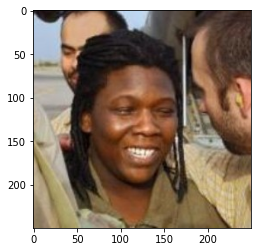

this is human which was ditected as :  Giant schnauzer


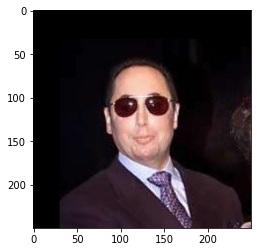

this is human which was ditected as :  Cairn terrier


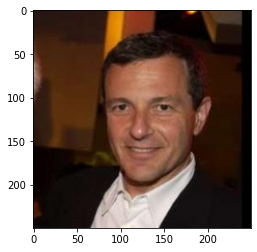

the dog breed is :  American staffordshire terrier


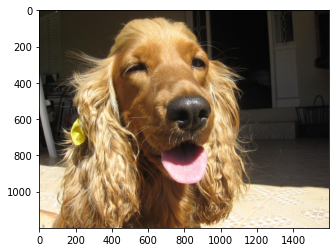

the dog breed is :  English cocker spaniel


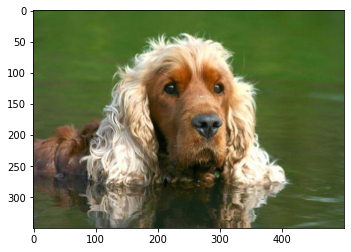

the dog breed is :  Belgian sheepdog


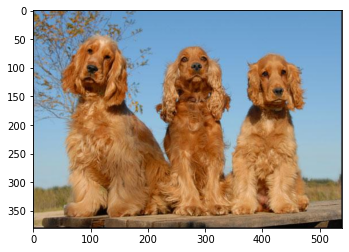

In [204]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

this is human which was ditected as :  Welsh springer spaniel


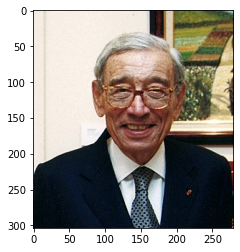

In [226]:
run_app('images/280px-Naelachohanboutrosghali-2.jpg')

this is human which was ditected as :  Welsh springer spaniel


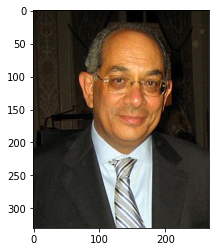

In [227]:
run_app('images/Youssef_Boutros_Ghali.jpg')

the dog breed is :  English setter


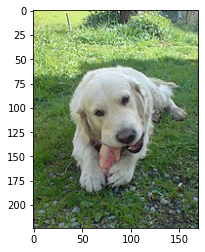

In [228]:
run_app('images/170px-Golden_retriever_eating_pigs_foot.jpg')

the dog breed is :  English setter


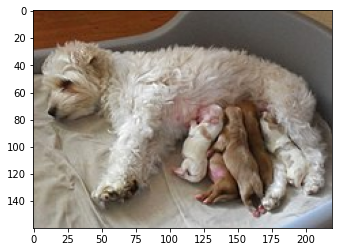

In [229]:
run_app('images/220px-Säugende_Hündin.JPG')

downloaded images are from wikipedia